# Problem Statement

**Implement skl confusion matrix on your data set and check type 1 and type 2 error.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
data = {'Age':[25,35,45,20,30,50,40,55,60,35],
        'Gender':['M','F','M','M','F','F','M','F','M','F'],
        'EstimatedSalary':[30000,40000,60000,20000,35000,80000,45000,90000,100000,50000],
        'Purchased':[0,0,1,0,1,1,0,1,1,0]}

df=pd.DataFrame(data)
print(df)

label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
print (df)

X=df.drop('Purchased',axis=1)
y=df['Purchased']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train,y_train)

y_pred=rf_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"The accuracy of the model is: {accuracy}")

   Age Gender  EstimatedSalary  Purchased
0   25      M            30000          0
1   35      F            40000          0
2   45      M            60000          1
3   20      M            20000          0
4   30      F            35000          1
5   50      F            80000          1
6   40      M            45000          0
7   55      F            90000          1
8   60      M           100000          1
9   35      F            50000          0
   Age  Gender  EstimatedSalary  Purchased
0   25       1            30000          0
1   35       0            40000          0
2   45       1            60000          1
3   20       1            20000          0
4   30       0            35000          1
5   50       0            80000          1
6   40       1            45000          0
7   55       0            90000          1
8   60       1           100000          1
9   35       0            50000          0
The accuracy of the model is: 0.5


In [3]:
np.random.seed(0)

n_samples = 100
ages = np.random.randint(20, 60, n_samples)
genders = np.random.choice(['M', 'F'], n_samples)
salaries = np.random.randint(20000, 100000, n_samples)
purchased = np.random.choice([0, 1], n_samples)


data = {
    'Age': ages,
    'Gender': genders,
    'EstimatedSalary': salaries,
    'Purchased': purchased
}

df1 = pd.DataFrame(data)

print(df1)

    Age Gender  EstimatedSalary  Purchased
0    20      F            35588          0
1    23      F            58395          0
2    23      M            80155          1
3    59      M            58214          0
4    29      M            20469          0
..  ...    ...              ...        ...
95   23      F            99835          1
96   54      F            36363          0
97   33      F            44785          1
98   59      F            75913          0
99   41      M            83418          1

[100 rows x 4 columns]


In [4]:
df1['Gender']=label_encoder.fit_transform(df1['Gender'])
print (df1)

    Age  Gender  EstimatedSalary  Purchased
0    20       0            35588          0
1    23       0            58395          0
2    23       1            80155          1
3    59       1            58214          0
4    29       1            20469          0
..  ...     ...              ...        ...
95   23       0            99835          1
96   54       0            36363          0
97   33       0            44785          1
98   59       0            75913          0
99   41       1            83418          1

[100 rows x 4 columns]


In [5]:
actual=df1['Purchased']
print(actual)
actual_data=np.array(actual)
print (actual_data)

0     0
1     0
2     1
3     0
4     0
     ..
95    1
96    0
97    1
98    0
99    1
Name: Purchased, Length: 100, dtype: int32
[0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0
 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1]


In [6]:
user_data=df1.drop('Purchased',axis=1)
print(user_data)

    Age  Gender  EstimatedSalary
0    20       0            35588
1    23       0            58395
2    23       1            80155
3    59       1            58214
4    29       1            20469
..  ...     ...              ...
95   23       0            99835
96   54       0            36363
97   33       0            44785
98   59       0            75913
99   41       1            83418

[100 rows x 3 columns]


In [7]:
prediction=rf_classifier.predict(user_data)
predicted_data=prediction
print(predicted_data)

[1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0
 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1]


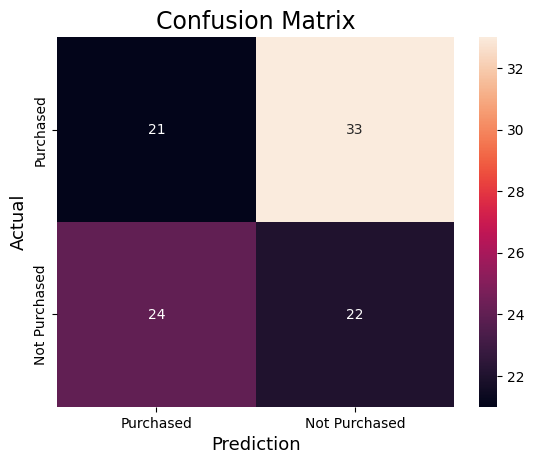

In [8]:
cm = confusion_matrix(actual_data,predicted_data)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Purchased','Not Purchased'], yticklabels=['Purchased','Not Purchased'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [1]:
TP=21
FP=24
FN=33
TN=22

Accuracy=(TP+TN)/(TP+TN+FP+FN)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F1_Score=(2*Precision*Recall)/(Precision+Recall)
Specificity=TN/(TN+FP)
Type1_Error=FP/(TN+FP)
Type2_Error=FN/(TP+FN)

print(f"Accuracy is: {Accuracy}")
print(f"Precision is: {Precision}")
print(f"Recall is: {Recall}")
print(f"F1_Score is: {F1_Score}")
print(f"Specificity is: {Specificity}")
print(f"Type1_Error is: {Type1_Error}")
print(f"Type2_Error is: {Type2_Error}")

Accuracy is: 0.43
Precision is: 0.4666666666666667
Recall is: 0.3888888888888889
F1_Score is: 0.42424242424242425
Specificity is: 0.4782608695652174
Type1_Error is: 0.5217391304347826
Type2_Error is: 0.6111111111111112


In [10]:
report =classification_report(actual_data,predicted_data)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.39      0.42        54
           1       0.40      0.48      0.44        46

    accuracy                           0.43       100
   macro avg       0.43      0.43      0.43       100
weighted avg       0.44      0.43      0.43       100

